In [55]:
#importing libraries
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [56]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist #with help of tensorflow framework i am loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [57]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [58]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [59]:
#normalizing the  pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [60]:
# Reshape images
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [61]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

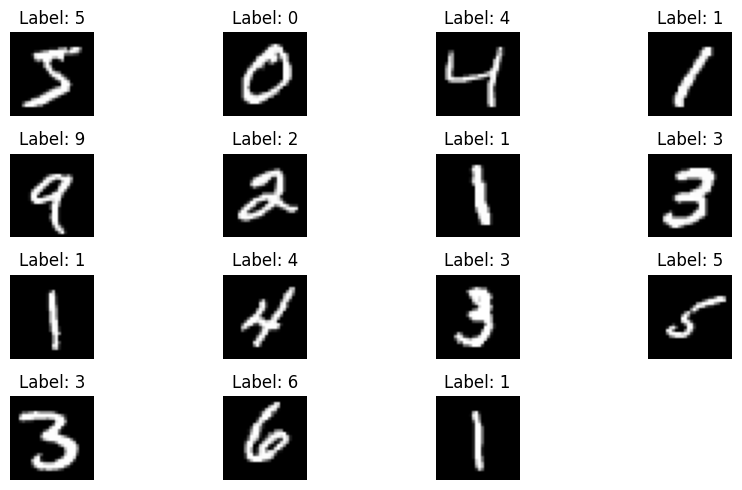

In [63]:
#displaying the images with their labels
plt.figure(figsize=(9, 5))

for i in range(15):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [64]:
# Data splitting
splits = [(0.8, 0.2), (0.5, 0.5), (0.2, 0.8), (0.01, 0.99)] #taking list of tuple and splliting data according we need

for split in splits:
  X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=split[1], random_state=42)

  #Standardization
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)



  # Model selection, training, and evaluation
  models = [LogisticRegression(max_iter=1000), SVC(), RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
  for model in models:
    model.fit(X_train_scaled, Y_train) #fitting model
    y_pred = model.predict(X_test_scaled)
    print(f'Model: {model.__class__.__name__}, Split: {split}')
    print('Accuracy:', accuracy_score(Y_test, y_pred))
    print('Precision:', precision_score(Y_test, y_pred,average='macro'))
    print('Recall:', recall_score(Y_test, y_pred, average='macro'))
    print('F1-score:', f1_score(Y_test, y_pred, average='macro'))
    print('Confusion Matrix:\n', confusion_matrix(Y_test, y_pred))

Model: LogisticRegression, Split: (0.8, 0.2)
Accuracy: 0.9150833333333334
Precision: 0.9142200966489599
Recall: 0.9142515622051117
F1-score: 0.9141856233785814
Confusion Matrix:
 [[1126    0    6    2    3    9   12    7    5    5]
 [   0 1279    8    8    2    6    1    0   14    4]
 [   3   22 1036   17   12    8   24   21   26    5]
 [   5    5   39 1085    2   36    1   13   20   13]
 [   1    3    6    3 1100    4   11    3    9   36]
 [  14    4   16   33   13  969   12    4   30    9]
 [  10    2   24    2    8   13 1112    2    4    0]
 [   4    8   21   12   17    4    0 1186    6   41]
 [  13   17   15   35    7   35   14    5 1002   17]
 [   5    4    6   11   27    8    0   37   10 1086]]
Model: SVC, Split: (0.8, 0.2)
Accuracy: 0.9635
Precision: 0.963923670252681
Recall: 0.9632505125585531
F1-score: 0.9635098798935161
Confusion Matrix:
 [[1152    0    3    0    2    5   10    1    2    0]
 [   0 1298   11    4    1    0    2    3    1    2]
 [   1    7 1128    9    6    0  